# Analyzing the effects of various features on life expectancy.

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Reading the data

data = pd.read_csv(r'C:\Users\R A H U L\Desktop\life expectancy\LifeExpectancyData.csv')

In [3]:
le = data
pd.set_option('display.max_columns', None)
le.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
le.shape

(2938, 22)

In [5]:
le.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,2938,193,Afghanistan,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,2938.0,NaN,NaN,NaN,2007.51872,4.613841,2000.0,2004.0,2008.0,2012.0,2015.0
Status,2938,2,Developing,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Life expectancy,2928.0,NaN,NaN,NaN,69.224932,9.523867,36.3,63.1,72.1,75.7,89.0
Adult Mortality,2928.0,NaN,NaN,NaN,164.796448,124.292079,1.0,74.0,144.0,228.0,723.0
infant deaths,2938.0,NaN,NaN,NaN,30.303948,117.926501,0.0,0.0,3.0,22.0,1800.0
Alcohol,2744.0,NaN,NaN,NaN,4.602861,4.052413,0.01,0.8775,3.755,7.7025,17.87
percentage expenditure,2938.0,NaN,NaN,NaN,738.251295,1987.914858,0.0,4.685343,64.912906,441.534144,19479.91161
Hepatitis B,2385.0,NaN,NaN,NaN,80.940461,25.070016,1.0,77.0,92.0,97.0,99.0
Measles,2938.0,NaN,NaN,NaN,2419.59224,11467.272489,0.0,0.0,17.0,360.25,212183.0


In [6]:
le.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
# Removing unwanted spaces from Column names

le = le.rename(columns=lambda x: x.strip())

# Data Cleaning

In [8]:
# Handling null values

le.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [9]:
# Life expectancy column

le['Life expectancy'].fillna(le['Life expectancy'].mean(),inplace = True)

In [10]:
# Adult Mortality column

le['Adult Mortality'].fillna(le['Adult Mortality'].mean(),inplace = True)

In [11]:
# BMI column

le['BMI'].fillna(le['BMI'].mean(),inplace = True)

In [12]:
# Diphtheria column

le['Diphtheria'].fillna(le['Diphtheria'].mean(),inplace = True)

In [13]:
# thinness  1-19 years column

le['thinness  1-19 years'].fillna(le['thinness  1-19 years'].mean(),inplace = True)

In [14]:
# thinness 5-9 years

le['thinness 5-9 years'].fillna(le['thinness 5-9 years'].mean(),inplace = True)

In [15]:
# alcohol column

le['Alcohol'].fillna(le['Alcohol'].mean(),inplace = True)

In [16]:
# Hepatitis B column

le['Hepatitis B'].fillna(le['Hepatitis B'].mean(),inplace = True)

In [17]:
# Polio column

le['Polio'].fillna(le['Polio'].mean(),inplace = True)

In [18]:
# Schooling column

le['Schooling'].fillna(le['Schooling'].mean(),inplace = True)

In [19]:
# Total expenditure column

le['Total expenditure'].fillna(le['Total expenditure'].mean(),inplace = True)

In [20]:
# Forward interpolating the remaining null values

le.interpolate(method = 'linear', limit_direction = 'forward', inplace = True)

In [21]:
le.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [22]:
# Checking duplicate values.

le[le.duplicated()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling


In [23]:
# Converting columns Life expectancy and Population to int.

le['Life expectancy'] = le['Life expectancy'].astype(int)
le['Population'] = le['Population'].astype(int)

# Categorical Features

In [24]:
# catagorical features

cat_feature = [feature for feature in le.columns if le[feature].dtypes=='O']
cat_feature

['Country', 'Status']

In [25]:
le.Country.nunique()  

193

In [26]:
le.Status.nunique()

2

In [27]:
le.Status.unique()

array(['Developing', 'Developed'], dtype=object)

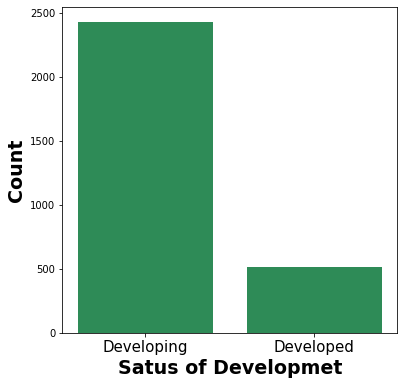

In [28]:
# Developing vs Developed

counts_dev = le['Status'].value_counts()

plt.figure(figsize=(6, 6))
plt.bar(counts_dev.index, counts_dev.values, color=['seagreen'])
plt.xlabel('Satus of Developmet', fontweight ='bold', fontsize = 19)
plt.ylabel('Count', fontweight ='bold', fontsize = 19)

x = ('Developing', 'Developed')

plt.xticks(counts_dev.index, x, color='black', fontsize = 15)
plt.show()

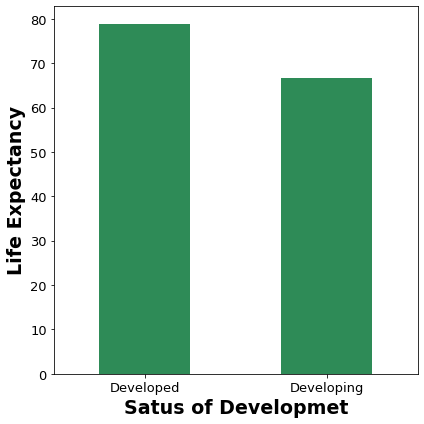

In [29]:
# Life Expectancy of developing vs. developed.

plt.figure(figsize=(6,6))
le.groupby(['Status'])['Life expectancy'].mean().plot(kind='bar', color=['seagreen'])

plt.xlabel('Satus of Developmet', fontweight ='bold', fontsize = 19)
plt.ylabel('Life Expectancy', fontweight ='bold', fontsize = 19)

plt.xticks(fontsize = 13,rotation = 0)
plt.yticks(fontsize = 13)

plt.tight_layout()

# Numerical Features


In [30]:
# numerical features

num_feature = list(le.drop(cat_feature, axis=1).columns)
print(num_feature)

['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


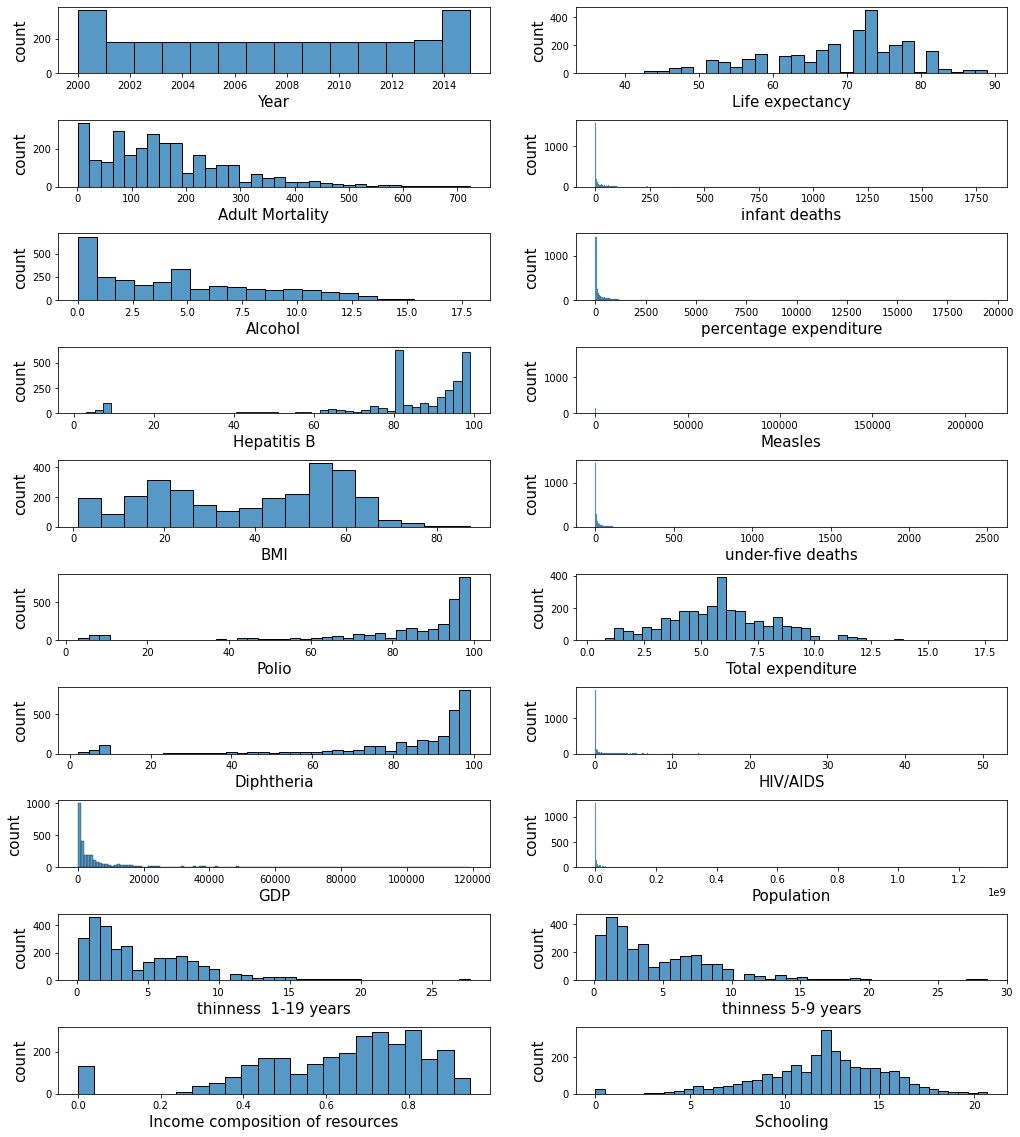

In [31]:
# Plotting all numeric features in a Subplots

fig, axs = plt.subplots(10,2, figsize=(17,20))
plt.subplots_adjust(hspace=0.7)
for c, feature in enumerate(num_feature):
    a= sns.histplot(x=feature, data=le, ax=axs.flat[c],)
    a.set_xlabel(feature,fontsize=15)
    a.set_ylabel('count',fontsize=15)

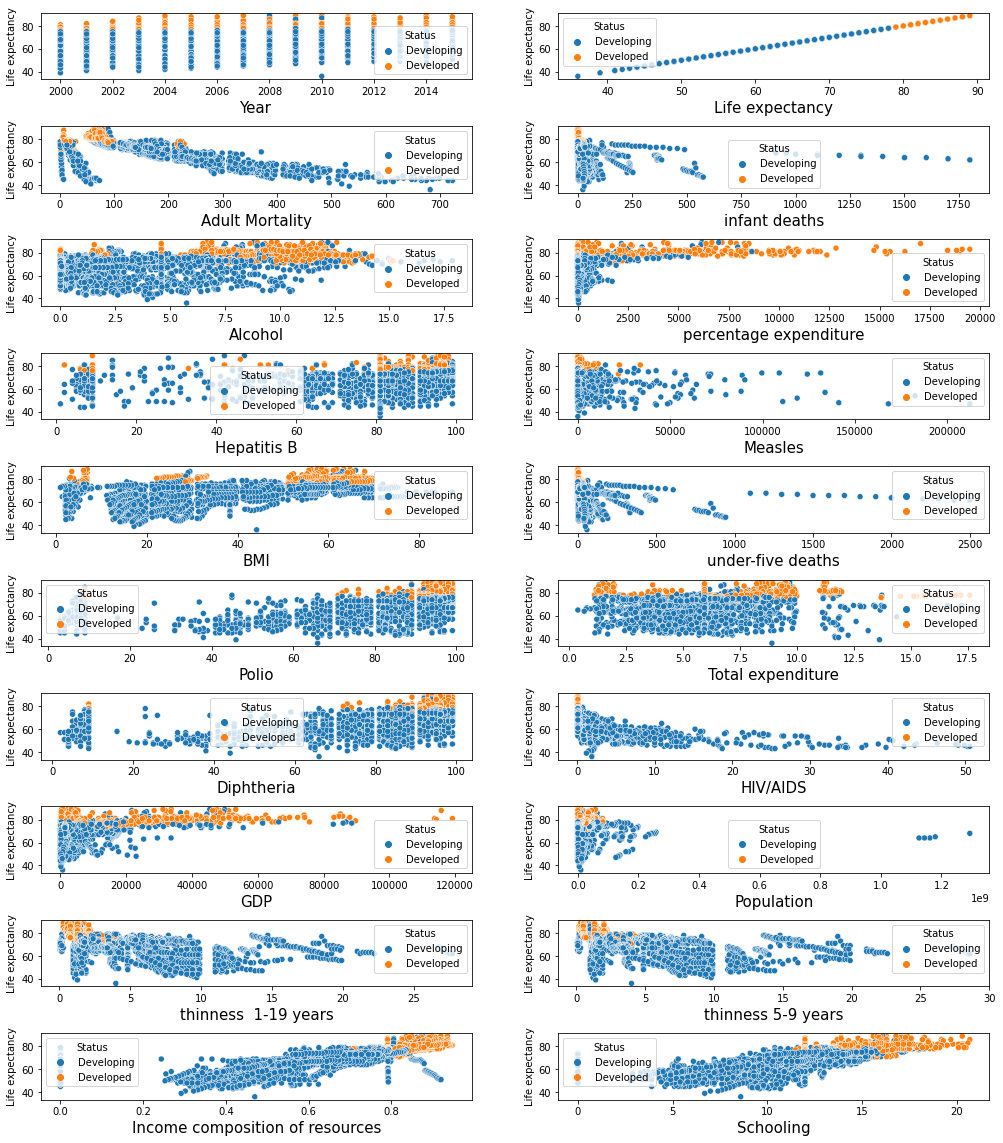

In [32]:
# Plotting numerical featues against Life_Expetancy

fig, axs = plt.subplots(10,2, figsize=(17,20))
plt.subplots_adjust(hspace=0.7)
for c, feature in enumerate(num_feature):
    a = sns.scatterplot(x=feature, y='Life expectancy', data=le, ax = axs.flat[c], hue='Status')
    a.set_xlabel(feature,fontsize=15)

# Observation


1.	Year - There no much change in Life Expectancy for developing but the average life expectancy of developed have increased from 2000 to 2014.
2.	Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population) from 0-100 - LE is varying all over range above 100, LE is dropping down as adult mortality increases, i.e. Negative correlation with LE
3.	Infant deaths (Number of Infant Deaths per 1000 population)- very less in Developed countries.
4.	Alcohol (recorded per capita (15+) consumption (in litres of pure alcohol)- No significant impact on LE some areas high value shows high LE, which is less likely to happen developed countries are not impacted by high alcohol, LE still on higher side
5.	Percentage expenditure (Expenditure on health as a percentage of Gross Domestic Product per capita (%))- high PE shows some increase in LE, reasonably looks true relation
6.	Hepatitis B ((HepB) immunization coverage among 1-year-olds) – does not have much effect on LE. 
7.	Measles (no. of recorded cases per 1000 population)- people from developed countries with measles have a higher LE than people from developing countries.
8.	BMI (bmi of entire population)- Higher BMI shows better LE
9.	under-five deaths (Number of under-five deaths per 1000 population)- very less in developed countries.
10.	Polio (immunization coverage among 1-year-olds (%))- Higher Polio vaccination coverage shows better LE in both cases.
11.	Total expenditure (General government expenditure on health as a percent of total government expenditure (%)) – government in developed countries have higher total expenditure budget in healthcare so there LE is high.
12.	Diphtheria ((DTP3) immunization coverage among 1-year-olds (%)) -  within range of 20 - 50 LE is low, after that no significant difference
13.	HIV/AIDS (Deaths per 1 000 live births (0-4 years)) -  developed countries with HIV cases have Higher LE than developing countries. And also LE is reduced for people with HIV.
14.	GDP (per capita (in USD)) - Higher GDP shows higher LE, as expected
15.	Population (Population of the country)- higher Population shows Higher LE, not sure.
16.	Thinness (Prevalence of thinness among children and adolescents for Age 10 to 19 (%)) - increase in thinness shows lower LE, but not in developed countries.
17.	Income composition of resources - increasing value shows increase in LE
18.	Schooling (Number of years of Schooling) – increase in schooling years shows a trend of increase in LE. And also developed countries have higher because they have access to better schools and education system.


# Exploring the correlation that exists between the various features.

In [33]:

features_corr = le.corr()['Life expectancy'].sort_values(ascending=False)
features_corr

Life expectancy                    1.000000
Schooling                          0.713770
Income composition of resources    0.689446
BMI                                0.558012
Diphtheria                         0.474722
Polio                              0.460995
GDP                                0.436272
Alcohol                            0.392528
percentage expenditure             0.382793
Total expenditure                  0.209004
Hepatitis B                        0.203170
Year                               0.169030
Population                        -0.006173
Measles                           -0.157610
infant deaths                     -0.196315
under-five deaths                 -0.222132
thinness 5-9 years                -0.466860
thinness  1-19 years              -0.472392
HIV/AIDS                          -0.555035
Adult Mortality                   -0.694177
Name: Life expectancy, dtype: float64

In [34]:
# High positive correlation (+0.5 to +1)

high_pos_cor = features_corr[features_corr >= 0.5].sort_values(ascending=False)

print("There is {} strongly positive correlated values with Life expectancy:\n\n{}".format(len(high_pos_cor), high_pos_cor))

There is 4 strongly positive correlated values with Life expectancy:

Life expectancy                    1.000000
Schooling                          0.713770
Income composition of resources    0.689446
BMI                                0.558012
Name: Life expectancy, dtype: float64


In [35]:
# High negative correlation (-0.5 to -1)

high_neg_cor = features_corr[features_corr <= -0.5].sort_values(ascending=False)

print("There is {} strongly negative correlated values with Life expectancy:\n\n{}".format(len(high_neg_cor), high_neg_cor))

There is 2 strongly negative correlated values with Life expectancy:

HIV/AIDS          -0.555035
Adult Mortality   -0.694177
Name: Life expectancy, dtype: float64


<Figure size 720x432 with 0 Axes>

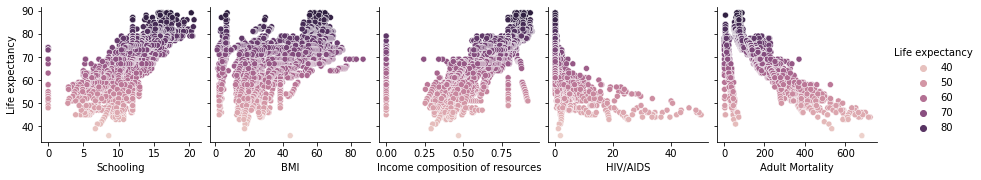

In [36]:
# Plotting strongly correlated values against Life Expectancy

cols = ['Schooling','BMI','Income composition of resources','HIV/AIDS','Adult Mortality']

plt.figure(figsize=(10,6))
sns.pairplot(data=le,
                x_vars=cols,
                y_vars=['Life expectancy'],hue='Life expectancy');

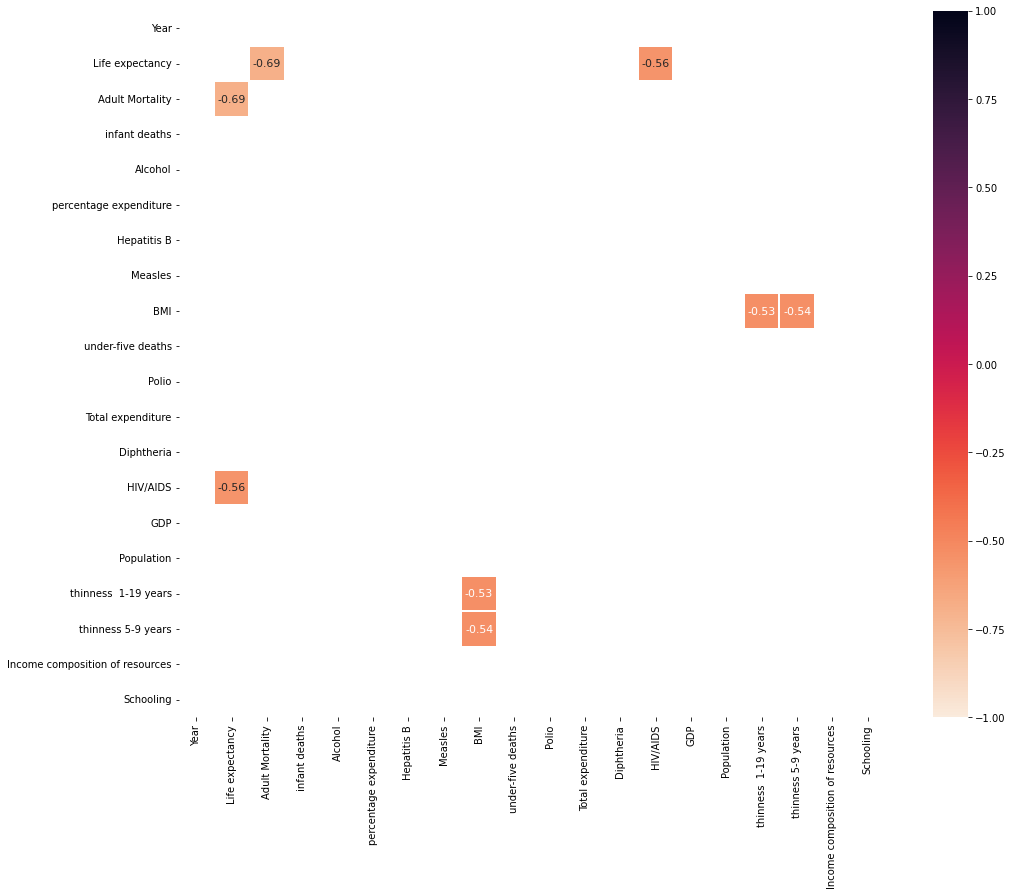

In [37]:
# Negative correlation heatmap

corr_mat = le.corr() 
plt.figure(figsize=(17,13))

sns.heatmap(corr_mat[(corr_mat <= -0.5)], cmap='rocket_r', annot=True, vmax=1.0, linewidths=0.4, vmin=-1.0, annot_kws={"size": 11}, square=True);


# Insights (-ve)

1. Life expectancy and Adult mortality (-0.69)

2. Life expectancy and HIV/AIDS (-0.56)

3. BMI and Thinness (-0.52 to -0.54)


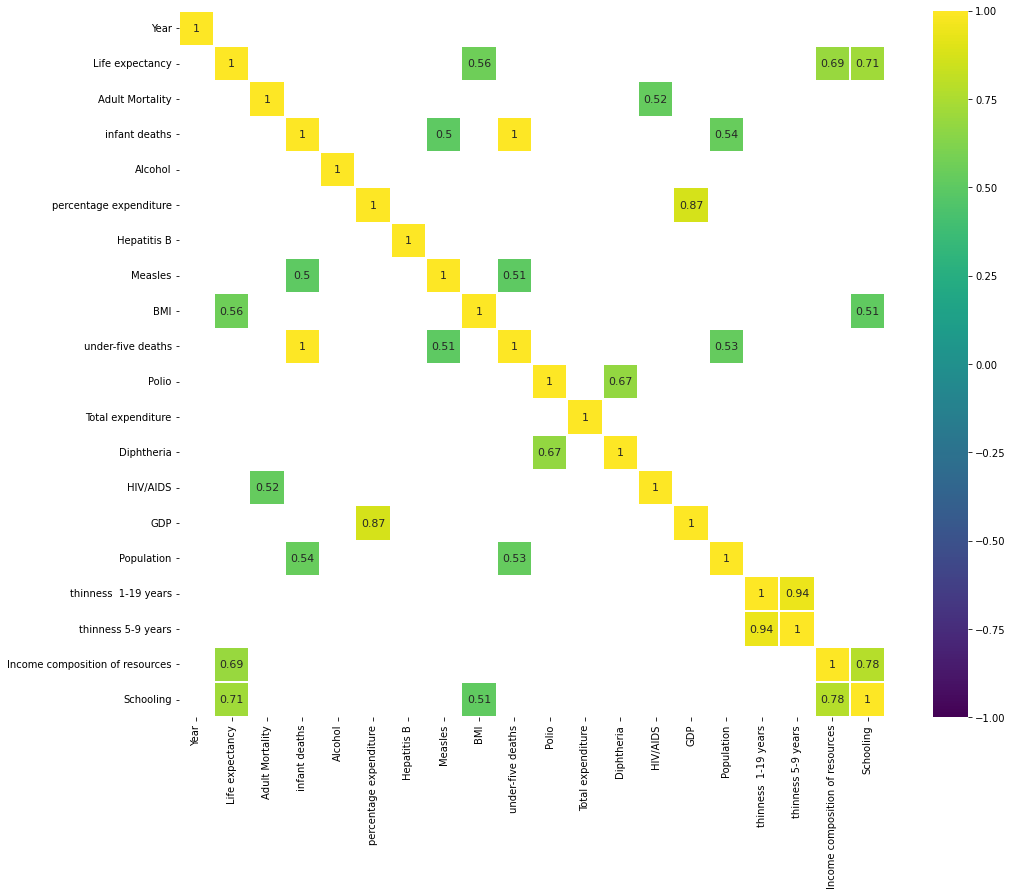

In [38]:
# Positive correlation heatmap

corr_mat = le.corr() 
plt.figure(figsize=(17,13))

sns.heatmap(corr_mat[(corr_mat >= 0.5)], cmap='viridis', annot=True, vmax=1.0, linewidths=0.4, vmin=-1.0, annot_kws={"size": 11}, square=True);


# Insights (+ve)

1. Life expecancy vs Schooling (0.71)

2. Life expectacy vs Income composition of resources (0.68)

3. BMI vs Life expectancy (0.55)

4. Percent expenditure vs GDP (0.87)

5. Schooling vs Life expectancy (0.71)

6. Income composition of resources vs Schooling (0.78)


<AxesSubplot:>

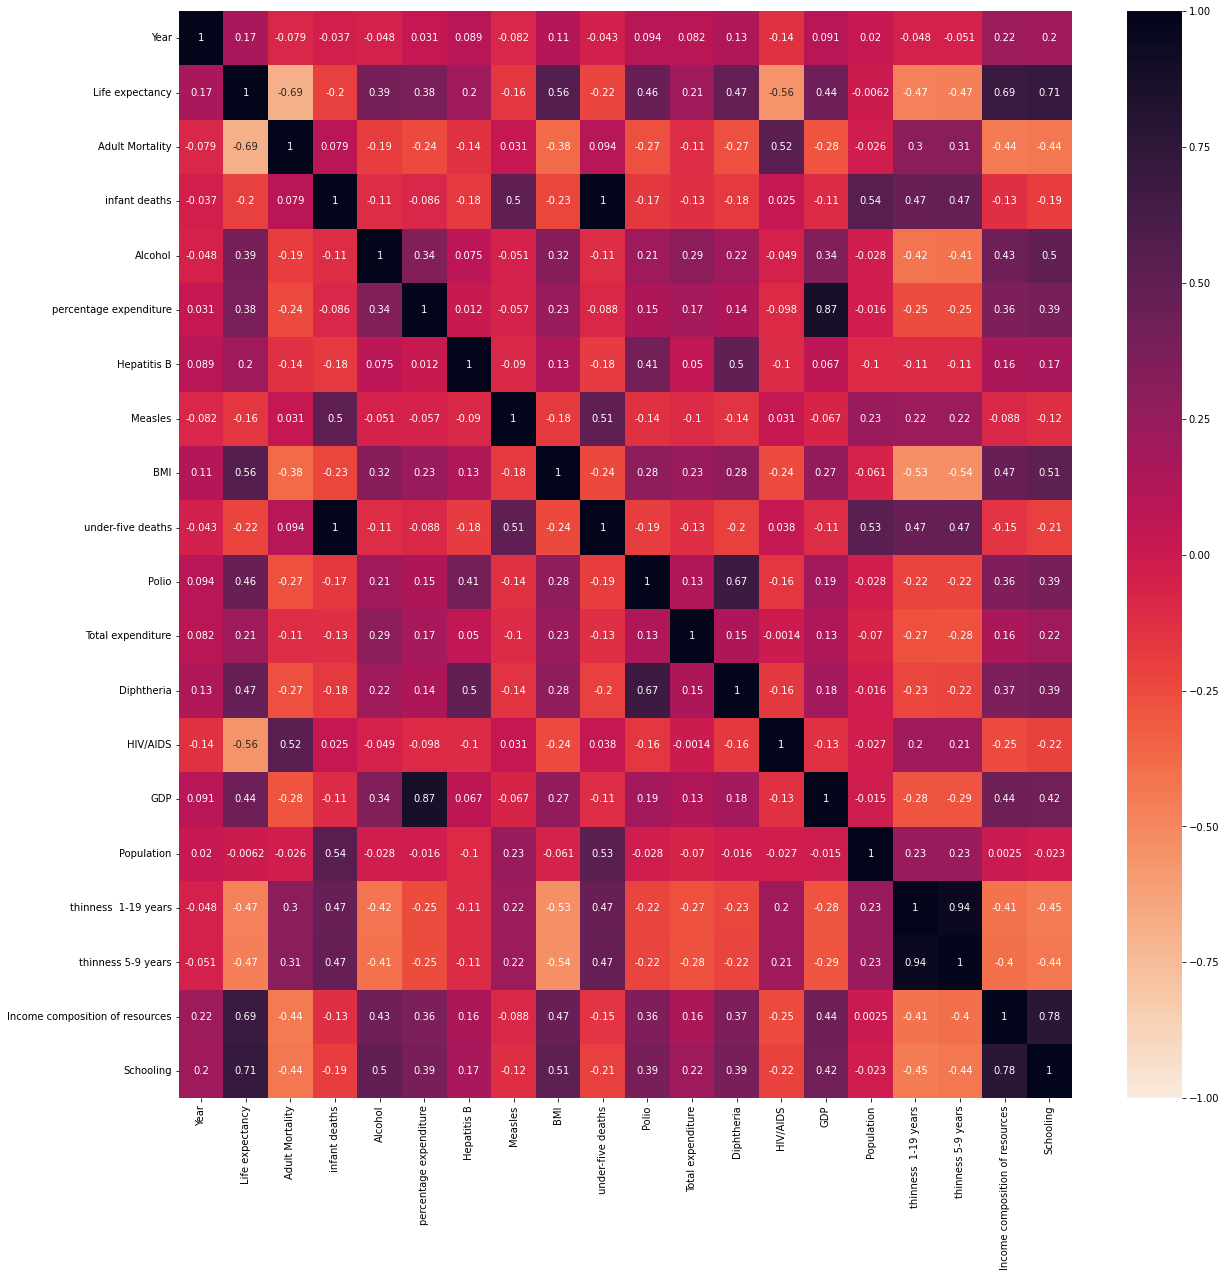

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(le.corr(),annot=True, vmax=1, vmin=-1, cmap='rocket_r')

# Observation inter-feature correlation

1. Measels and infant deaths (0.5)

2. Mesels and under five deaths (0.51)

3. HIV and Adult Mortality (0.52), many adults died due to HIV

4. Population and infant deaths(0.56)

5. thinness and infant deaths(0.47)

In [40]:
avg_le_less_than_65 = le.groupby('Country')['Life expectancy'].mean()
avg_le_less_than_65 = avg_le_less_than_65[avg_le_less_than_65 < 65].sort_values(ascending=False).round(decimals=2)
avg_le_less_than_65

Country
Kiribati                            64.75
Sao Tome and Principe               64.69
Timor-Leste                         64.31
Turkmenistan                        64.19
Pakistan                            64.06
Cambodia                            63.94
Myanmar                             63.75
Yemen                               63.44
Mauritania                          62.62
Madagascar                          62.25
Senegal                             62.12
Lao People's Democratic Republic    62.00
Gabon                               61.75
Sudan                               61.38
Papua New Guinea                    61.25
Comoros                             61.19
Ghana                               60.44
Djibouti                            60.38
Eritrea                             60.31
Namibia                             60.00
Haiti                               59.44
Gambia                              59.12
Rwanda                              58.94
Ethiopia                  

In [41]:
# Life expectancy in top 10 developed country to that of developing country.


le_by_status = le.groupby('Country')['Life expectancy'].mean().sort_values(ascending = False)
le_by_status.head(10), le_by_status.tail(10)

(Country
 Sweden         82.1250
 Iceland        82.1250
 Japan          82.1250
 Switzerland    82.0625
 France         82.0000
 Italy          81.8125
 Spain          81.7500
 Canada         81.4375
 Norway         81.4375
 Australia      81.3750
 Name: Life expectancy, dtype: float64,
 Country
 Nigeria                     51.0000
 Swaziland                   50.8750
 Zimbabwe                    50.1250
 Chad                        50.0000
 Côte d'Ivoire               49.9375
 Malawi                      49.5625
 Angola                      48.6250
 Lesotho                     48.3750
 Central African Republic    48.0000
 Sierra Leone                45.8750
 Name: Life expectancy, dtype: float64)

In [42]:
# Life expectacy by Year

a = le.groupby('Year')['Life expectancy'].mean()
a

Year
2000    66.338798
2001    66.721311
2002    66.934426
2003    67.038251
2004    67.278689
2005    67.814208
2006    68.289617
2007    68.606557
2008    69.010929
2009    69.573770
2010    69.655738
2011    70.251366
2012    70.497268
2013    70.740933
2014    71.147541
2015    71.191257
Name: Life expectancy, dtype: float64

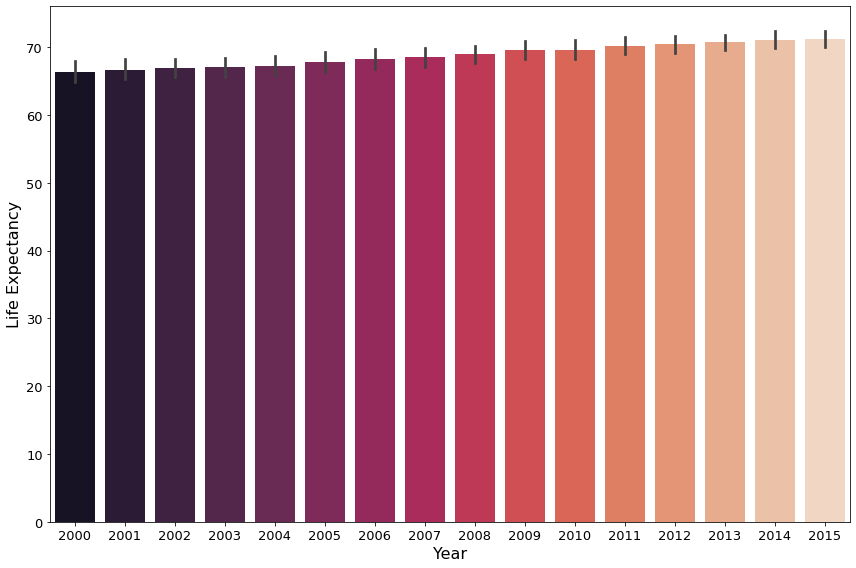

In [43]:
plt.figure(figsize=(12,8))
sns.barplot(x='Year', y='Life expectancy', data=le, palette='rocket')

plt.xlabel("Year", fontsize = 16)
plt.ylabel("Life Expectancy", fontsize = 16)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.tight_layout()

# Answers

1. Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?

--> Status, Adult Mortality, percentage expenditure, HIV, GDP, schooling, Income composition of resources.

2. How does Infant and Adult mortality rates affect life expectancy?

-->LE is is inversly propotional to Adult mortality
-->LE do not have much relation with infant death

3. Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.

-->LE is high with high BMI, which shows costly eating habits
-->LE is inversely related to thiness, which shows lower eating habits results in lower LE
-->LE is high in developed countries, lifestyle is gererally higher in developed countries.
-->No feature showing exercise or smoking.
-->LE is positiveley correlated to drinking alcohol

4. What is the impact of schooling on the lifespan of humans?

-->Schooling improves lifespan of humans

5. Does Life Expectancy have positive or negative relationship with drinking alcohol?

-->Drinking alcohol is positively correlated to LE

6. Do densely populated countries tend to have lower life expectancy?

-->No, Densely pouplated countries have higher LE

7. What is the impact of Immunization coverage on life Expectancy?

--> considering Polio as immunization process, we can observe that with in increase in polio immunization, LE is inreasing in countries.